# Netflix Exploratory Data Analysis

## Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading the Dataset

In [2]:
Netflix = pd.read_csv('netflix.csv')
Netflix.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [3]:
Netflix.shape

(8807, 12)

In [4]:
Netflix.size

105684

In [5]:
Netflix.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

## Analysis of Movies vs TV Shows

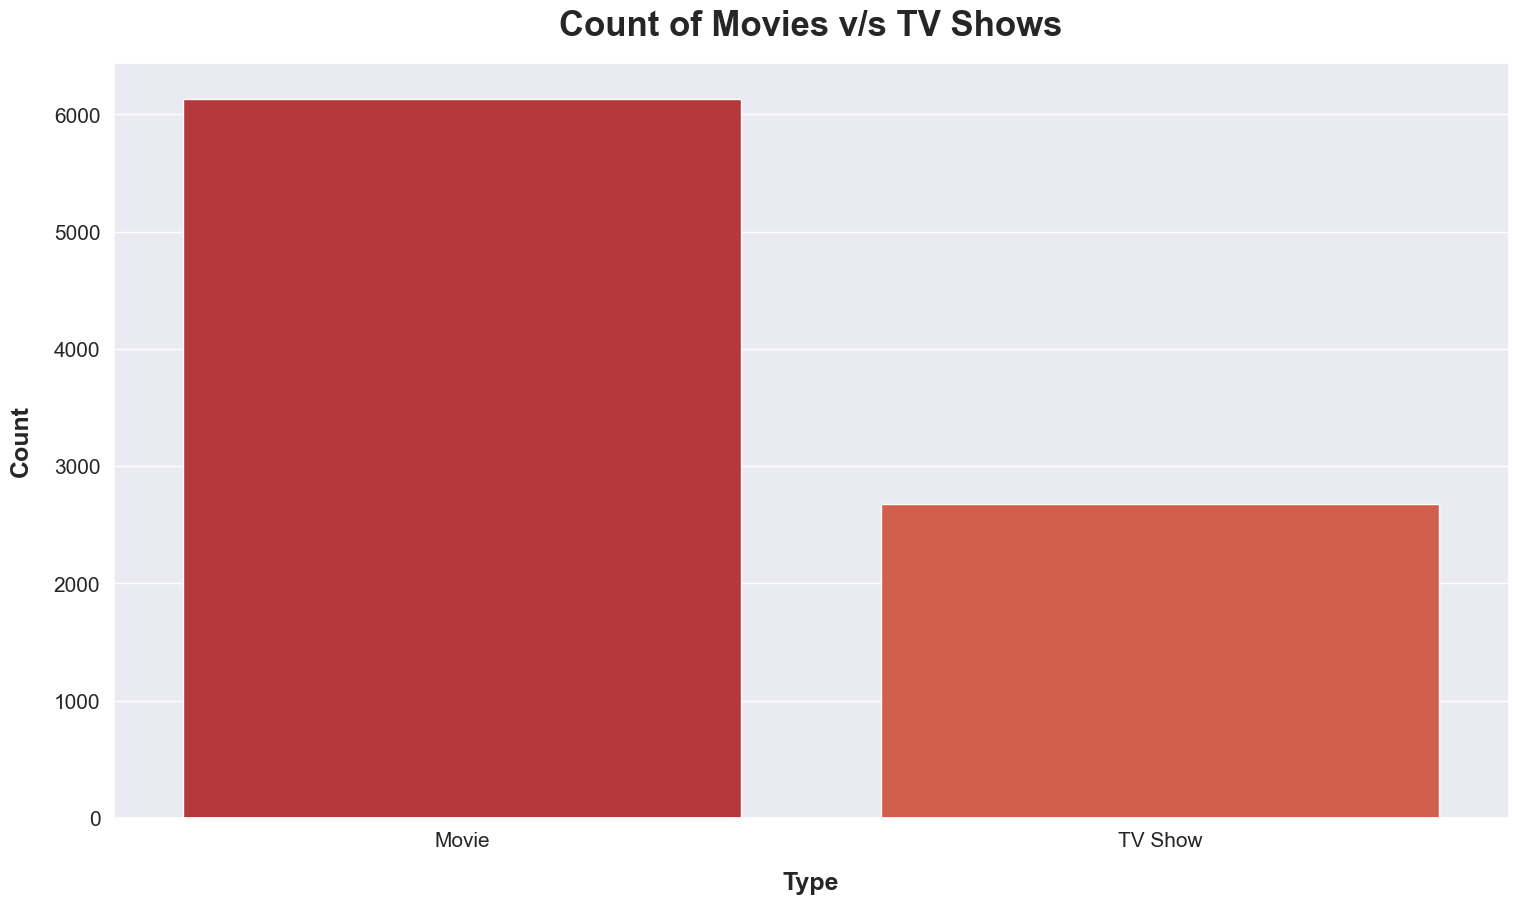

In [6]:
sns.set(style="darkgrid")
plt.figure(figsize=(18, 10), dpi=100)
sns.countplot(x="type", data=Netflix, palette=sns.color_palette("RdYlBu", 12))
plt.title("Count of Movies v/s TV Shows", fontsize=25, fontweight="bold", position=(0.5, 1), pad=20)
plt.xlabel("Type", fontsize=18, fontweight="bold", labelpad=15)
plt.ylabel("Count", fontsize=18, fontweight="bold", labelpad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Movie Ratings Analysis

In [7]:
netflix_movies = Netflix[Netflix["type"] == "Movie"]
netflix_shows = Netflix[Netflix["type"] == "TV Show"]

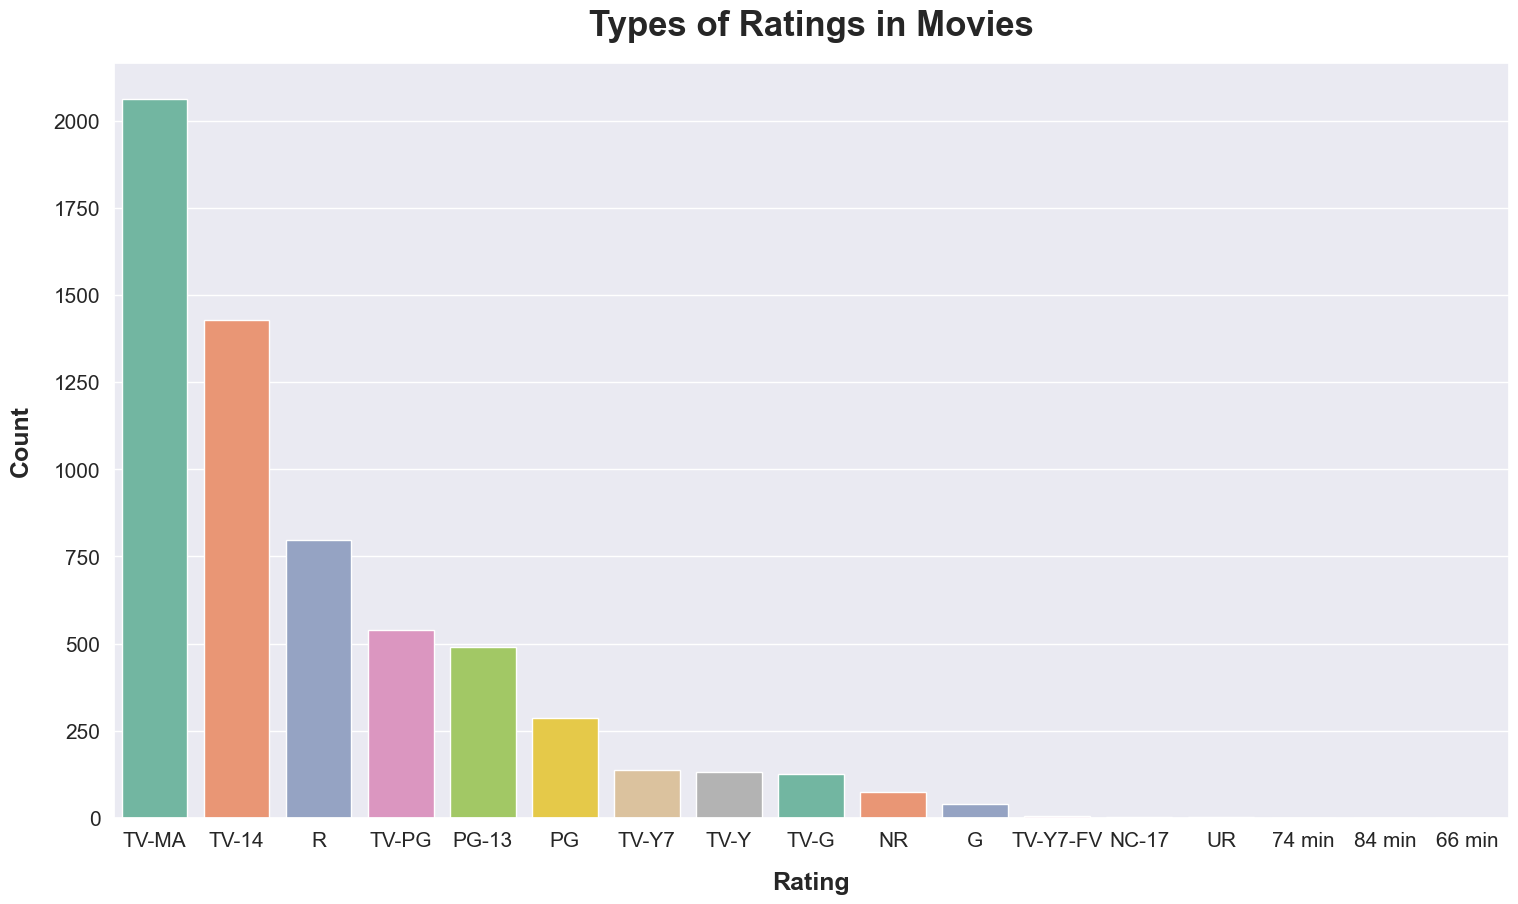

In [8]:
netflix_movies = Netflix[Netflix["type"] == "Movie"]
sns.set(style="darkgrid")
plt.figure(figsize=(18, 10), dpi=100)
sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts(ascending=False).index)
plt.title("Types of Ratings in Movies", fontsize=25, fontweight="bold", position=(0.5, 1), pad=20)
plt.xlabel("Rating", fontsize=18, fontweight="bold", labelpad=15)
plt.ylabel("Count", fontsize=18, fontweight="bold", labelpad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Netflix Contents Update

In [9]:
netflix_shows = Netflix[Netflix["type"] == "TV Show"]
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
# string = "   Septemper 25, 2002"
# print(string.lstrip())
# Returns Septemper 25, 2002 without spaces in left.
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

In [10]:
df = netflix_date.groupby('year')
df

In [11]:
df = netflix_date.groupby('year')['month']
df

In [12]:
df = netflix_date.groupby('year')['month'].value_counts()
df

year  month    
2008  February      1
2013  October       2
      August        1
      March         1
      September     1
                   ..
2021  April        53
      February     44
      May          38
      March        37
      January      36
Name: month, Length: 88, dtype: int64

In [13]:
df = netflix_date.groupby('year')['month'].value_counts().unstack()
df

month  April  August  December  February  January  July  June  March   May  \
year                                                                         
2008     NaN     NaN       NaN       1.0      NaN   NaN   NaN    NaN   NaN   
2013     NaN     1.0       NaN       NaN      NaN   NaN   NaN    1.0   NaN   
2014     1.0     NaN       1.0       1.0      NaN   NaN   NaN    NaN   NaN   
2015     4.0     NaN       7.0       1.0      NaN   2.0   2.0    2.0   1.0   
2016     8.0    11.0      44.0       6.0     28.0   9.0   7.0    3.0   4.0   
2017    27.0    38.0      38.0      17.0     14.0  34.0  29.0   38.0  23.0   
2018    28.0    34.0      61.0      24.0     24.0  27.0  28.0   35.0  27.0   
2019    43.0    44.0      47.0      45.0     37.0  59.0  46.0   53.0  48.0   
2020    50.0    47.0      68.0      42.0     53.0  43.0  41.0   44.0  52.0   
2021    53.0    61.0       NaN      44.0     36.0  88.0  83.0   37.0  38.0   

month  November  October  September  
year                                 
2008        NaN      NaN        NaN  
2013        NaN      2.0        1.0  
2014        2.0      NaN        NaN  
2015        2.0      4.0        1.0  
2016       18.0     19.0       19.0  
2017       30.0     29.0       32.0  
2018       36.0     45.0       43.0  
2019       68.0     65.0       37.0  
2020       51.0     51.0       53.0  
2021        NaN      NaN       65.0

In [14]:
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df

year       2008  2013  2014  2015  2016  2017  2018  2019  2020  2021
month                                                                
December    0.0   0.0   1.0   7.0  44.0  38.0  61.0  47.0  68.0   0.0
November    0.0   0.0   2.0   2.0  18.0  30.0  36.0  68.0  51.0   0.0
October     0.0   2.0   0.0   4.0  19.0  29.0  45.0  65.0  51.0   0.0
September   0.0   1.0   0.0   1.0  19.0  32.0  43.0  37.0  53.0  65.0
August      0.0   1.0   0.0   0.0  11.0  38.0  34.0  44.0  47.0  61.0
July        0.0   0.0   0.0   2.0   9.0  34.0  27.0  59.0  43.0  88.0
June        0.0   0.0   0.0   2.0   7.0  29.0  28.0  46.0  41.0  83.0
May         0.0   0.0   0.0   1.0   4.0  23.0  27.0  48.0  52.0  38.0
April       0.0   0.0   1.0   4.0   8.0  27.0  28.0  43.0  50.0  53.0
March       0.0   1.0   0.0   2.0   3.0  38.0  35.0  53.0  44.0  37.0
February    1.0   0.0   1.0   1.0   6.0  17.0  24.0  45.0  42.0  44.0
January     0.0   0.0   0.0   0.0  28.0  14.0  24.0  37.0  53.0  36.0

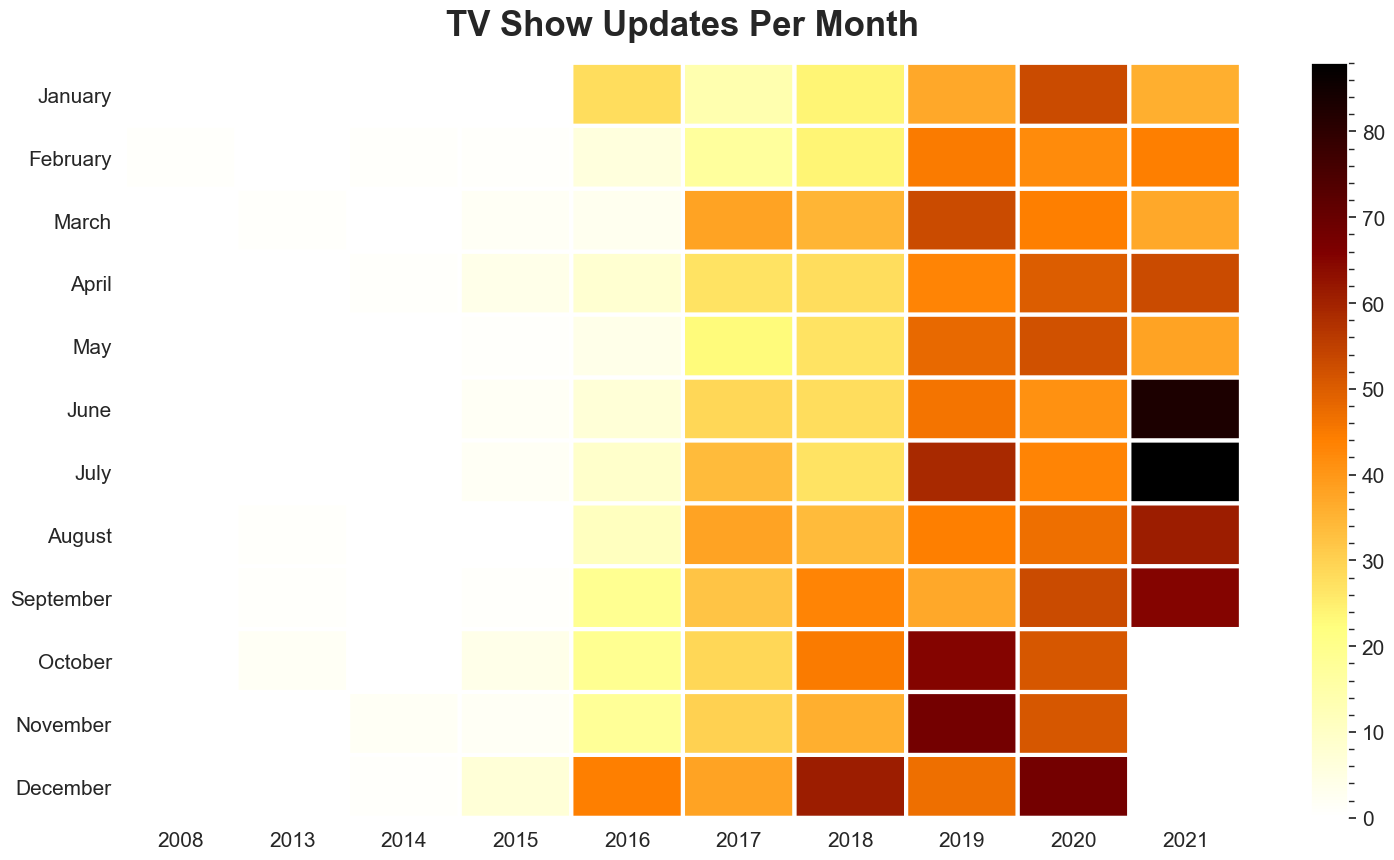

In [16]:
netflix_shows = Netflix[Netflix["type"] == "TV Show"]
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])

# string = "   Septemper 25, 2002"
# print(string.lstrip())
# Returns "Septemper 25, 2002" without spaces in left.

netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(figsize=(18, 10), dpi=100)
plt.title("TV Show Updates Per Month", fontsize=25, fontweight="bold", pad=20)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=15)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=15)

# Heatmap
plt.pcolor(df, cmap='afmhot_r', edgecolor='white', linewidths=3)

# Color Bar on left side
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
cbar.ax.minorticks_on()

# Incase MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() occurs
plt.rcParams['axes.grid'] = False
plt.show()

## Year-wise Analysis

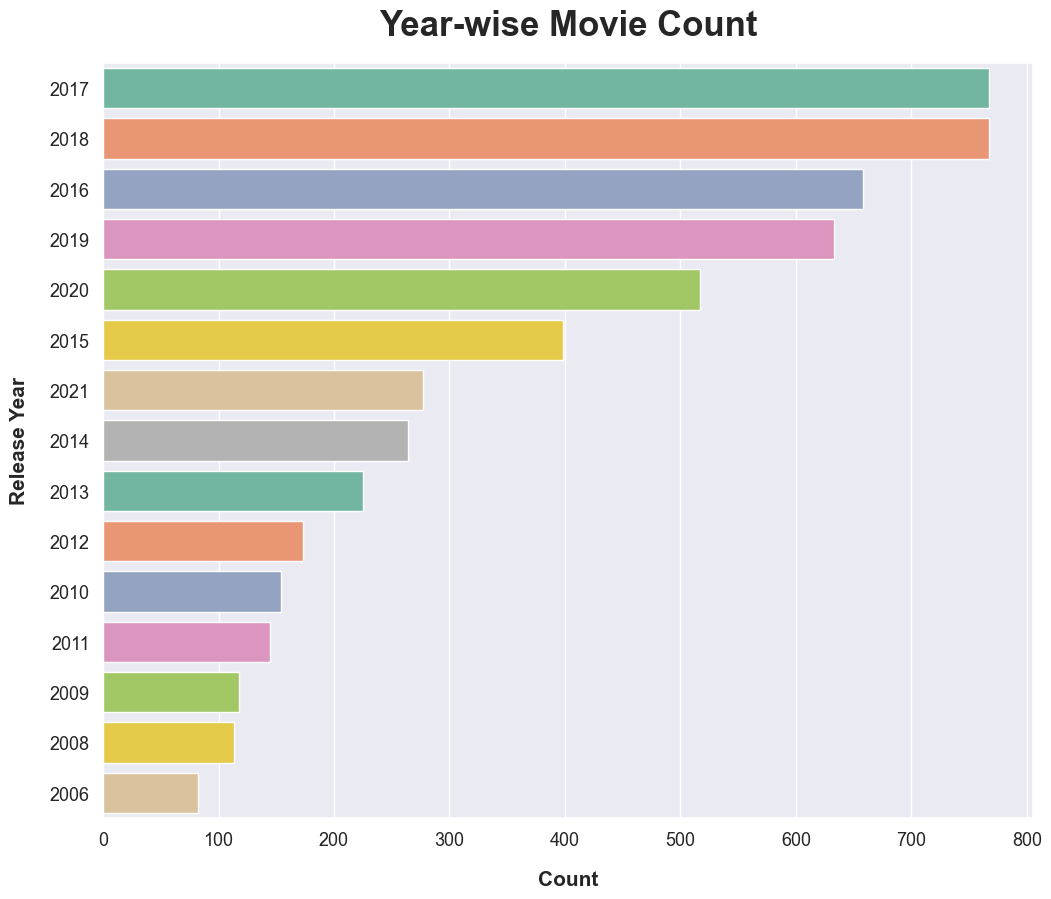

In [17]:
netflix_movies = Netflix[Netflix["type"] == "Movie"]
plt.figure(figsize=(12,10), dpi=100)
sns.set(style="darkgrid")
sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts(ascending=False).index[0:15])
plt.title("Year-wise Movie Count", fontsize=25, fontweight="bold", position=(0.5, 1), pad=20)
plt.xlabel("Count", fontsize=15, fontweight="bold", labelpad=15)
plt.ylabel("Release Year", fontsize=15, fontweight="bold", labelpad=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

## Top 10 Movies Creating Countries

In [18]:
# Dictionary with three keys
# Dictionary1 = {'A': 'Geeks', 'B': 'For', 'C': 'Geeks'}
# Printing keys of dictionary
# print(Dictionary1.keys())
# dict_values(['Geeks', 'For', 'Geeks'])

countries = {}
netflix_movies['country'] = netflix_movies['country'].fillna('Unknown')
cou = list(netflix_movies['country'])
for i in cou:
    # print(i)
    i = list(i.split(','))
    if len(i) == 1:
        # print(i)
        if i in list(countries.keys()):
            countries[i] += 1
        else:
            countries[i[0]] = 1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j] += 1
            else:
                countries[j] = 1
                
# print(countries)
# {'United States': 1, 'Unknown': 1, ' Burkina Faso': 1, ' United Kingdom': 152, ' Germany': 104}

C:\Users\user\AppData\Local\Temp\ipykernel_19216\1116861018.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['country'] = netflix_movies['country'].fillna('Unknown')


In [19]:
countries_fin = {}
for country, num in countries.items():
    # country = country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country] += num
    else:
        countries_fin[country] = num
        
# print(countries_fin)
countries_fin = {key: val for key, val in sorted(countries_fin.items(), key=lambda item: item[1], reverse=True)}
# print(countries_fin)

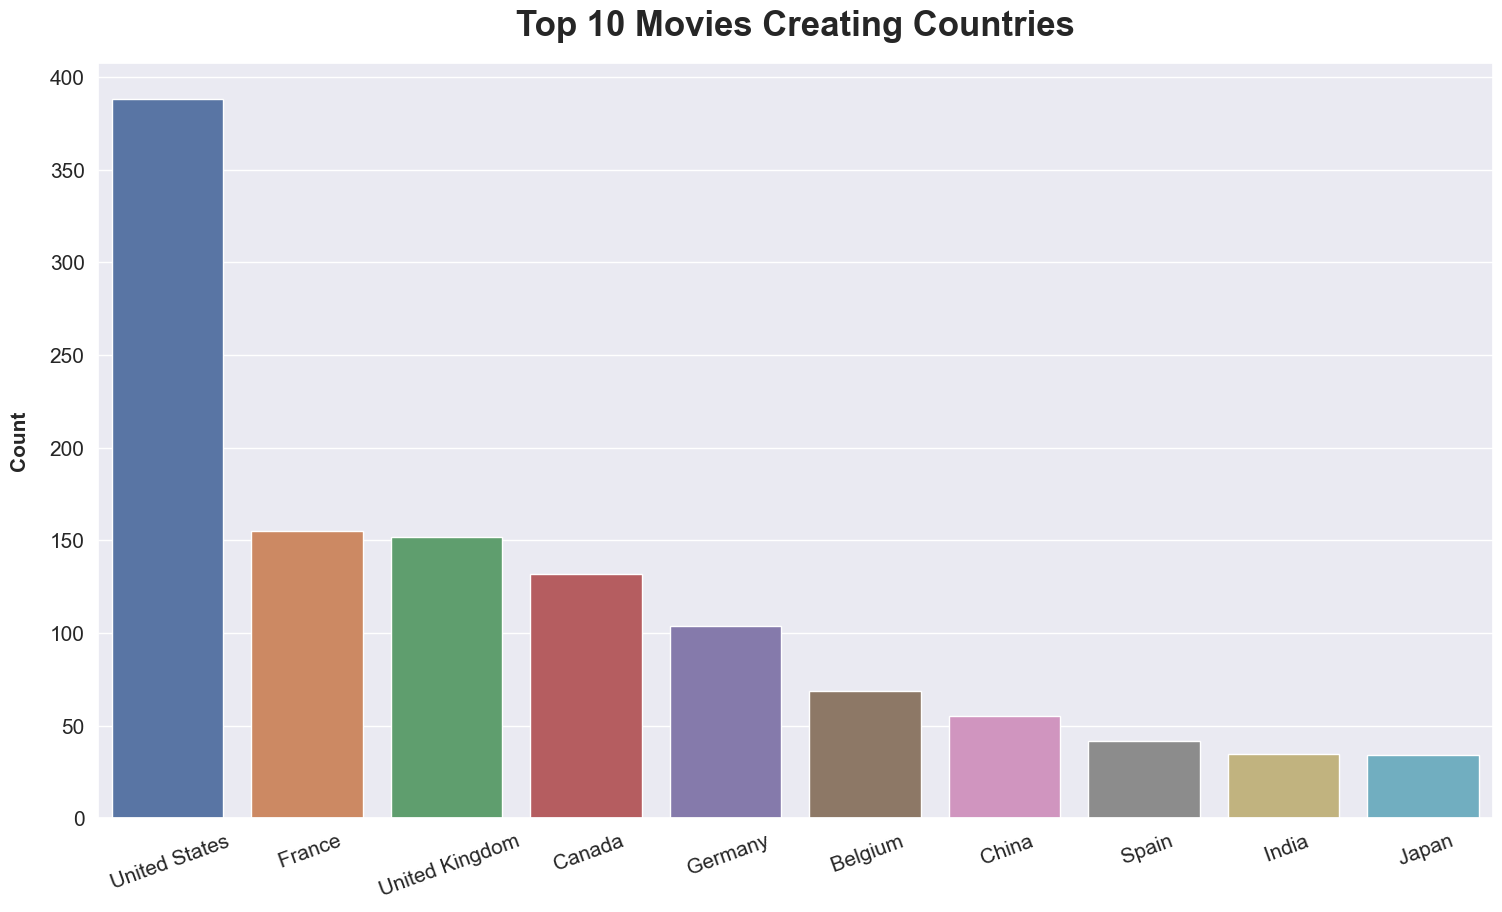

In [20]:
plt.figure(figsize=(18, 10), dpi=100)
plt.title("Top 10 Movies Creating Countries", fontsize=25, fontweight="bold", position=(0.5, 1), pad=20)
plt.ylabel("Count", fontsize=15, fontweight="bold", labelpad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax = sns.barplot(x=list(countries_fin.keys())[0:10], y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10], rotation=20)
plt.show()

## Top 10 TV Shows Creating Countries

In [21]:
netflix_shows['country'].head()

1    South Africa
2             NaN
3             NaN
4           India
5             NaN
Name: country, dtype: object

In [22]:
countries1 = {}
netflix_shows['country'] = netflix_shows['country'].fillna('Unknown')
cou1 = list(netflix_shows['country'])
for i in cou1:
    # print(i)
    i = list(i.split(','))
    if len(i) == 1:
        # print(i)
        if i in list(countries1.keys()):
            countries1[i] += 1
        else:
            countries1[i[0]] = 1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j] += 1
            else:
                countries1[j] = 1

C:\Users\user\AppData\Local\Temp\ipykernel_19216\2003169841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_shows['country'] = netflix_shows['country'].fillna('Unknown')


In [23]:
countries_fin1 = {}
for country, num in countries1.items():
    # country = country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country] += num
    else:
        countries_fin1[country] = num
        
# print(countries_fin)
countries_fin1 = {key: val for key, val in sorted(countries_fin1.items(), key=lambda item: item[1], reverse=True)}
# print(countries_fin)

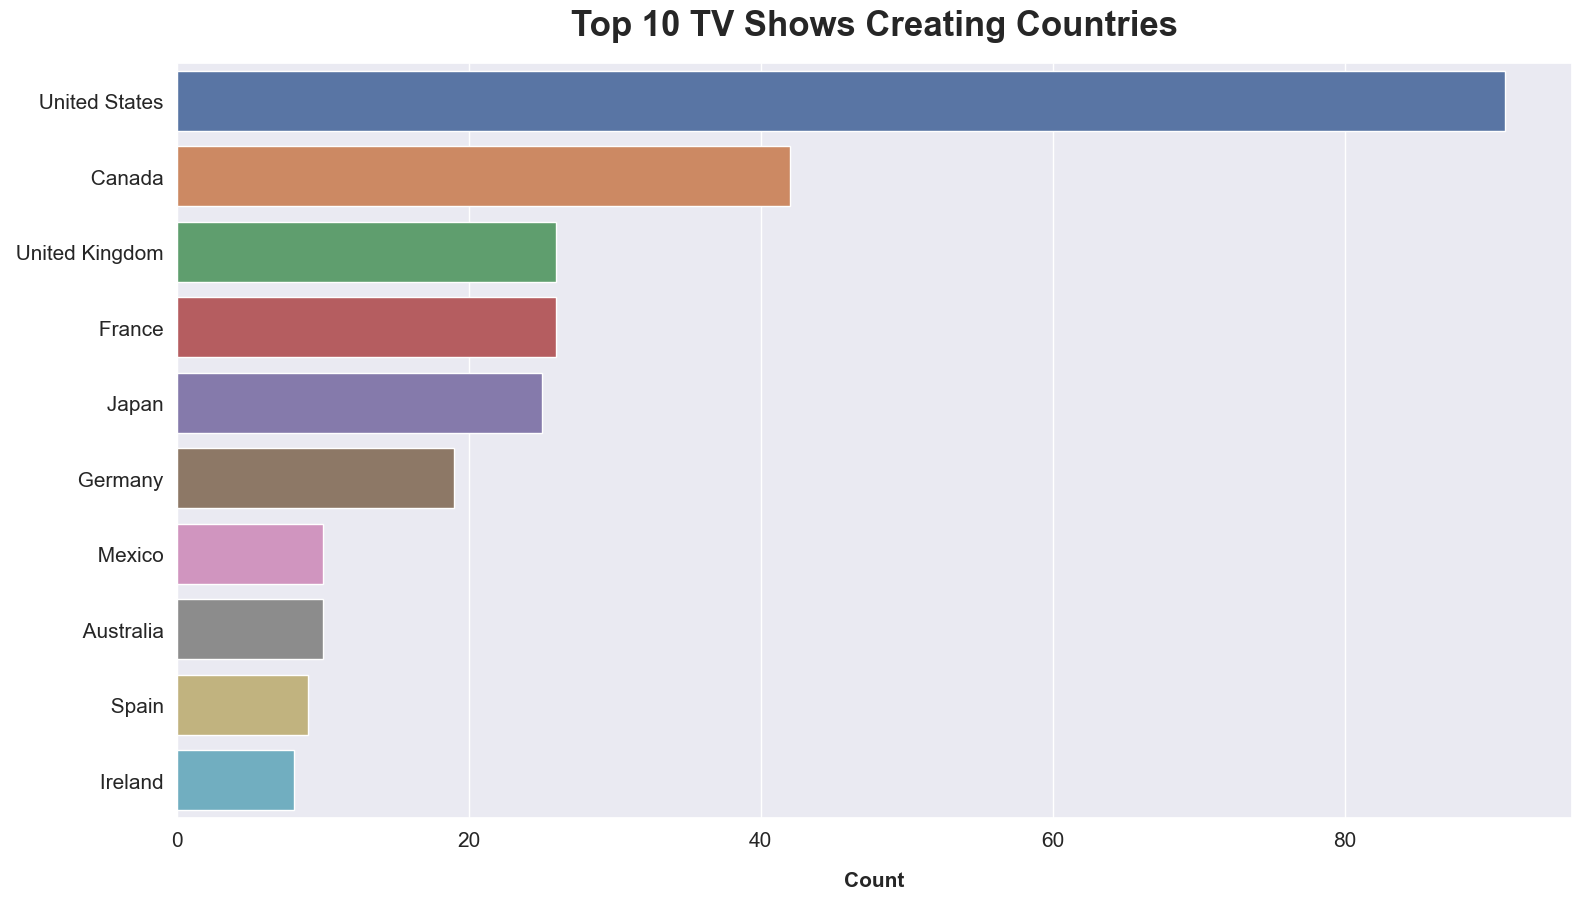

In [24]:
plt.figure(figsize=(18, 10), dpi=100)
plt.title("Top 10 TV Shows Creating Countries", fontsize=25, fontweight="bold", position=(0.5, 1), pad=20)
plt.xlabel("Count", fontsize=15, fontweight="bold", labelpad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

sns.barplot(y=list(countries_fin1.keys())[0:10], x=list(countries_fin1.values())[0:10])
plt.show()

## Analysis of Duration of Movies

In [25]:
netflix_movies = Netflix[Netflix["type"] == "Movie"]

# To avoid SettingWithCopyWarning
pd.options.mode.chained_assignment = None

netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '')
netflix_movies['duration'] = netflix_movies['duration'].astype(float)
# print(netflix_movies['duration'])

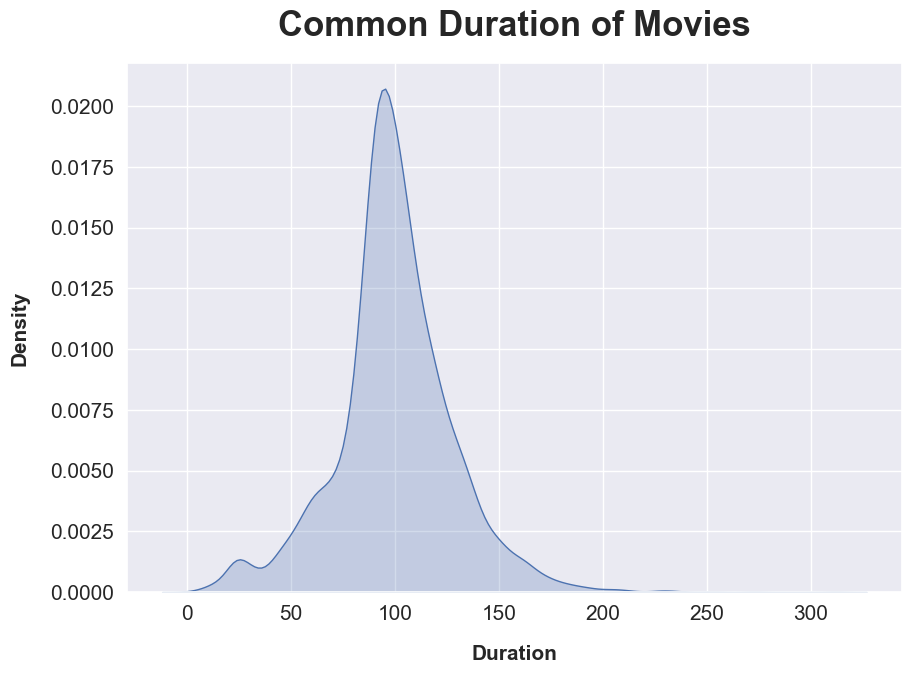

In [26]:
plt.figure(figsize=(10, 7), dpi=100)
plt.title("Common Duration of Movies", fontsize=25, fontweight="bold", pad=20)
plt.xlabel("Duration", fontsize=15, fontweight="bold", labelpad=15)
plt.ylabel("Density", fontsize=15, fontweight="bold", labelpad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True, color="b")
plt.show()

## WordCloud for Genres in Movies & TV Shows

In [27]:
from collections import Counter

# a = ["a", "a", "b", "c", "c"]
# b = Counter(a)
# print(b) returns Counter({'a': 2, 'c': 2, 'b': 1})

genres = list(netflix_movies['listed_in'])
gen = []
for i in genres:
    i = list(i.split(','))
    for j in i:
        j = j.replace("'", '')
        gen.append(j.replace(' ',""))
g = Counter(gen)
g

Counter({'Documentaries': 869,
         'Children&FamilyMovies': 641,
         'Dramas': 2427,
         'IndependentMovies': 756,
         'InternationalMovies': 2752,
         'Comedies': 1674,
         'Thrillers': 577,
         'RomanticMovies': 616,
         'Music&Musicals': 375,
         'HorrorMovies': 357,
         'Sci-Fi&Fantasy': 243,
         'Action&Adventure': 859,
         'ClassicMovies': 116,
         'AnimeFeatures': 71,
         'SportsMovies': 219,
         'CultMovies': 71,
         'Faith&Spirituality': 65,
         'LGBTQMovies': 102,
         'Stand-UpComedy': 343,
         'Movies': 57})

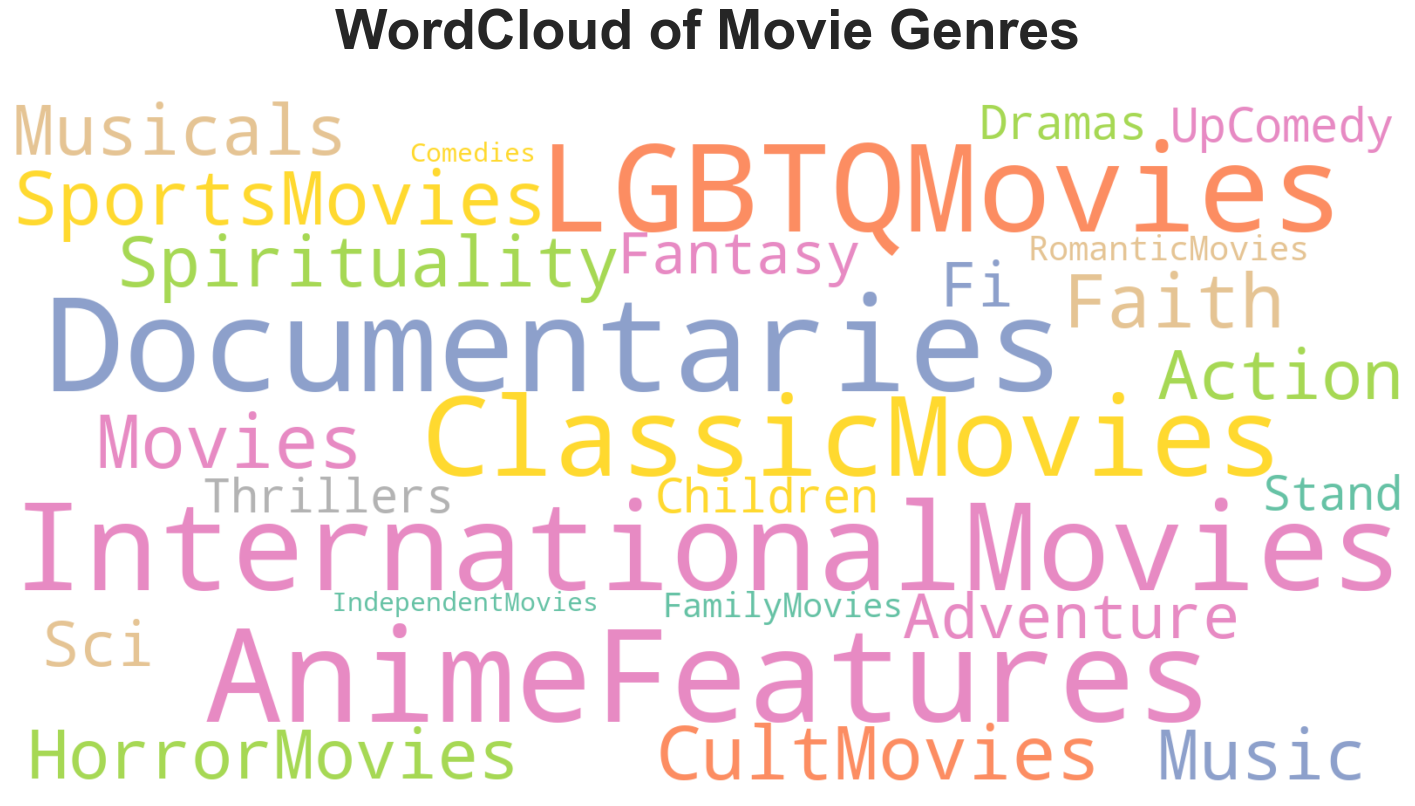

In [28]:
from wordcloud import WordCloud
from PIL import Image

text = list(set(gen))

plt.figure(figsize=(18, 10), dpi=100)
plt.title("WordCloud of Movie Genres", fontsize=40, fontweight="bold", pad=35)


#assigning shape to the word cloud
mask = np.array(Image.open('logo.png'))
wordcloud = WordCloud(max_words=1000,background_color="white", mask=mask, colormap='Set2', max_font_size=150).generate(str(text).replace("'", ''))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [29]:
from collections import Counter

# a = ["a", "a", "b", "c", "c"]
# b = Counter(a)
# print(b) returns Counter({'a': 2, 'c': 2, 'b': 1})

genres = list(netflix_shows['listed_in'])
gen = []
for i in genres:
    i = list(i.split(','))
    for j in i:
        j = j.replace("'", '')
        gen.append(j.replace(' ',""))
g = Counter(gen)

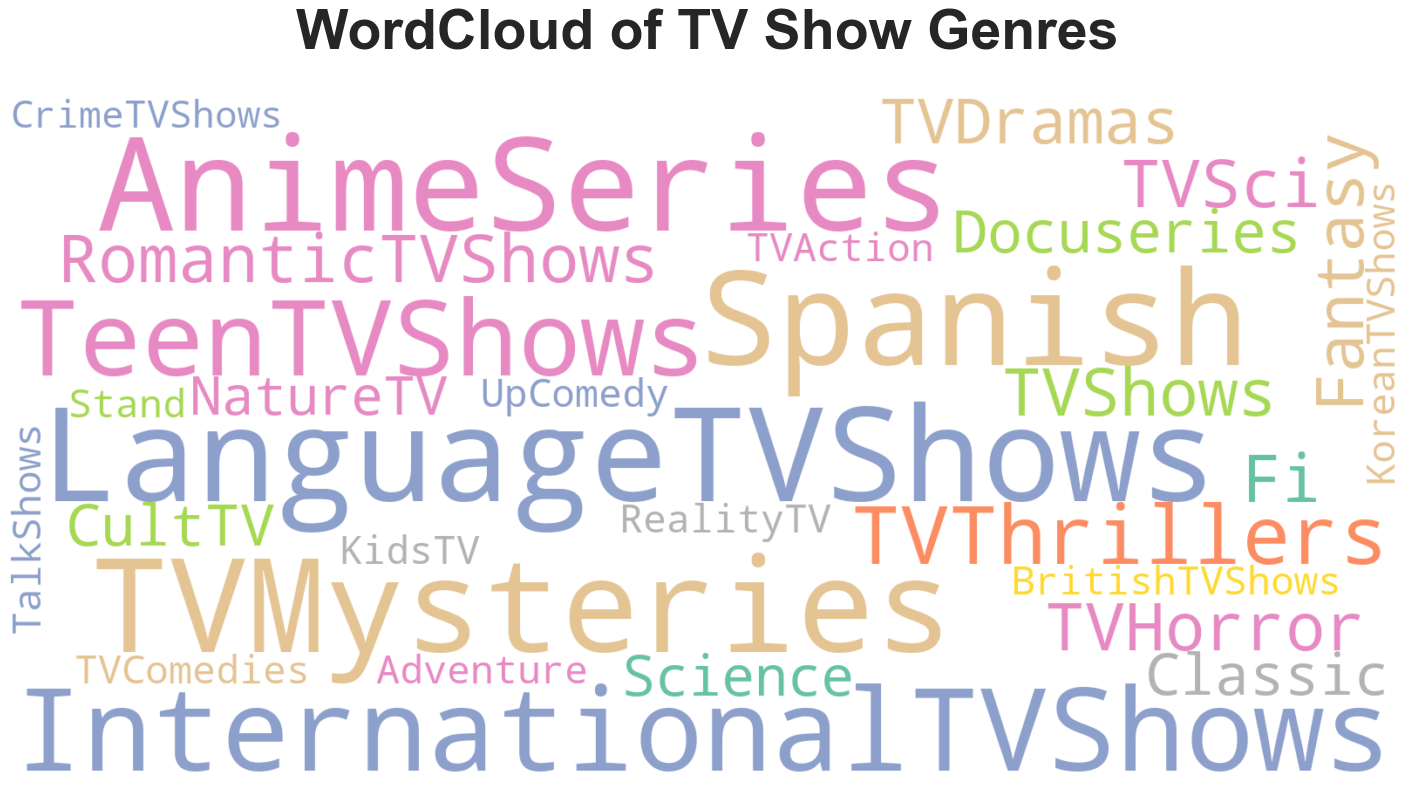

In [30]:
from wordcloud import WordCloud
from PIL import Image

text = list(set(gen))

plt.figure(figsize=(18, 10), dpi=100)
plt.title("WordCloud of TV Show Genres", fontsize=40, fontweight="bold", pad=35)


#assigning shape to the word cloud
mask = np.array(Image.open('logo.png'))
wordcloud = WordCloud(max_words=1000,background_color="white", mask=mask, colormap='Set2', max_font_size=150).generate(str(text).replace("'", ''))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Lollipop Plot of Genres vs Count of Genres

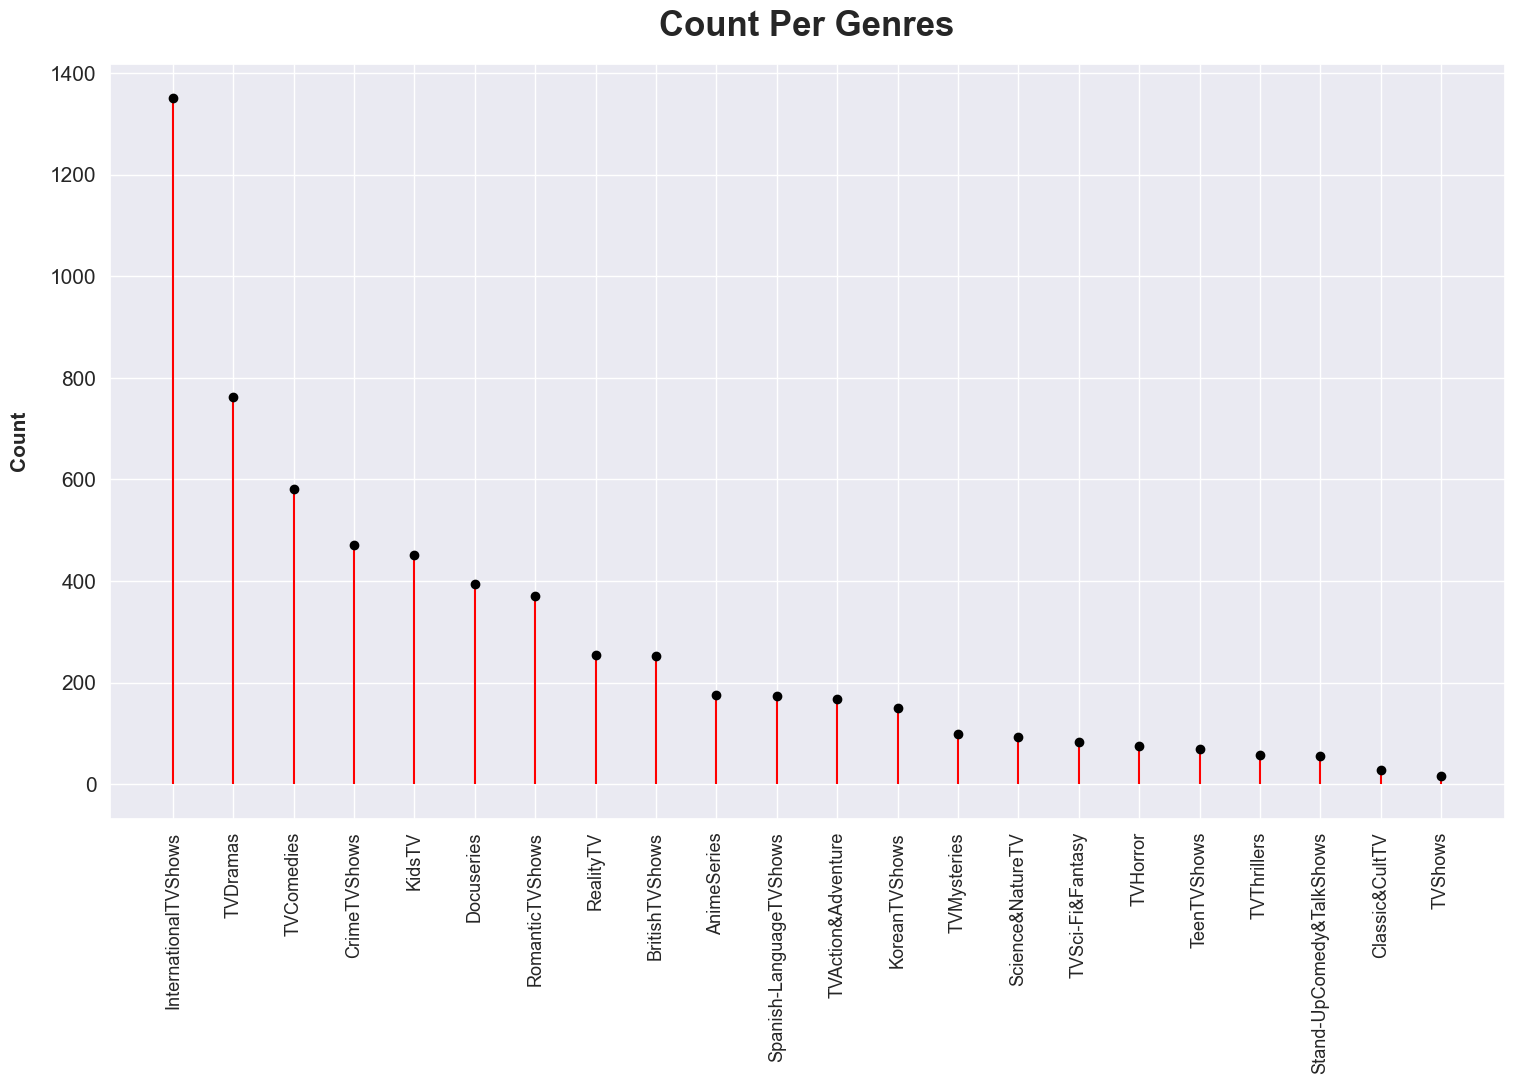

In [31]:
g = {k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


plt.figure(figsize=(18, 10), dpi=100)
plt.title("Count Per Genres", fontsize=25, fontweight="bold", pad=20)
plt.ylabel("Count", fontsize=15, fontweight="bold", labelpad=15)
plt.xticks(fontsize=13, rotation=90)
plt.yticks(fontsize=15)


x = list(g.keys())
y = list(g.values())
plt.vlines(x, ymin=0, ymax=y, color='red')
plt.plot(x, y, "o", color='black')
plt.show()

## TV Shows With Largest Number of Seasons

In [32]:
netflix_shows = Netflix[Netflix["type"] == "TV Show"]
features = ['title', 'duration']
durations = netflix_shows[features]

durations['no_of_seasons'] = durations['duration'].str.replace(' Season', '')
durations.head()

title   duration no_of_seasons
1          Blood & Water  2 Seasons            2s
2              Ganglands   1 Season             1
3  Jailbirds New Orleans   1 Season             1
4           Kota Factory  2 Seasons            2s
5          Midnight Mass   1 Season             1

In [33]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')
durations['no_of_seasons']=durations['no_of_seasons'].astype(int)
durations.head()

title   duration  no_of_seasons
1          Blood & Water  2 Seasons              2
2              Ganglands   1 Season              1
3  Jailbirds New Orleans   1 Season              1
4           Kota Factory  2 Seasons              2
5          Midnight Mass   1 Season              1

In [34]:
t = ['title', 'no_of_seasons']
top = durations[t]
top = top.sort_values(by='no_of_seasons', ascending=False)

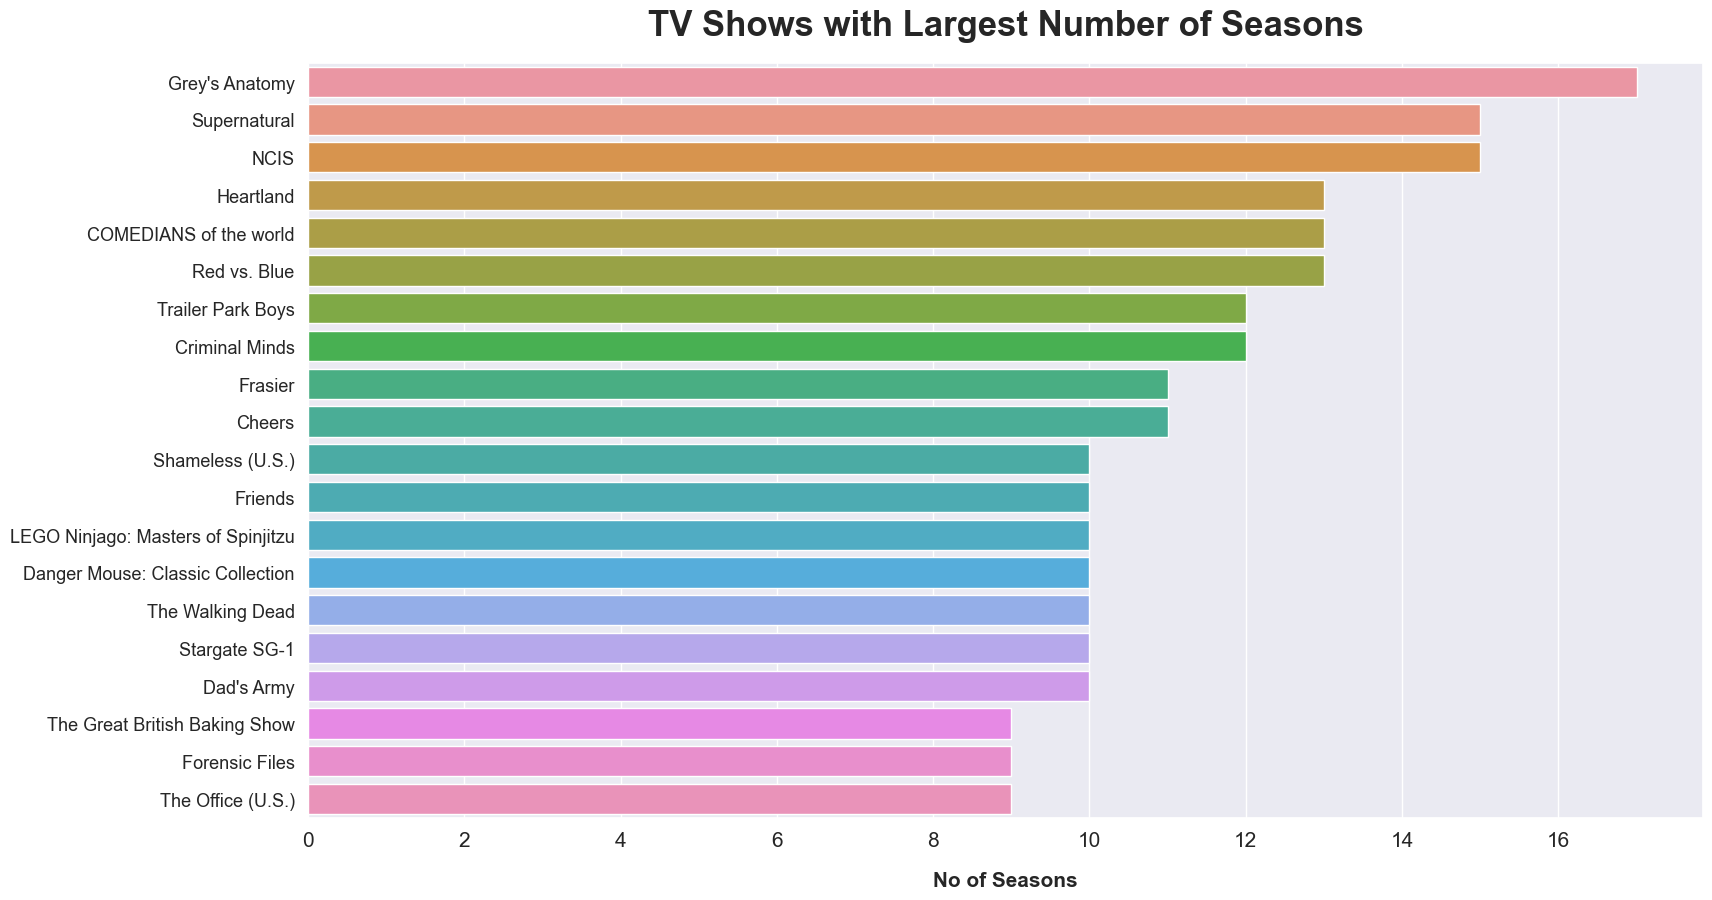

In [35]:
plt.figure(figsize=(18, 10), dpi=100)
plt.title("TV Shows with Largest Number of Seasons", fontsize=25, fontweight="bold", pad=20)
plt.xlabel("No of Seasons", fontsize=15, fontweight="bold", labelpad=15)
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=13)

top20 = top[0:20]
sns.barplot(y=list(top20['title']), x=list(top20['no_of_seasons']))
#  color=(0.2, 0.4, 0.6, 0.6) R, G, B & Transparency as 4 tuple
plt.show()

## Oldest US TV Shows on Netflix

In [36]:
us_series_data = netflix_shows[netflix_shows['country']=='United States']
oldest_us_series=us_series_data.sort_values(by='release_year')[0:20]

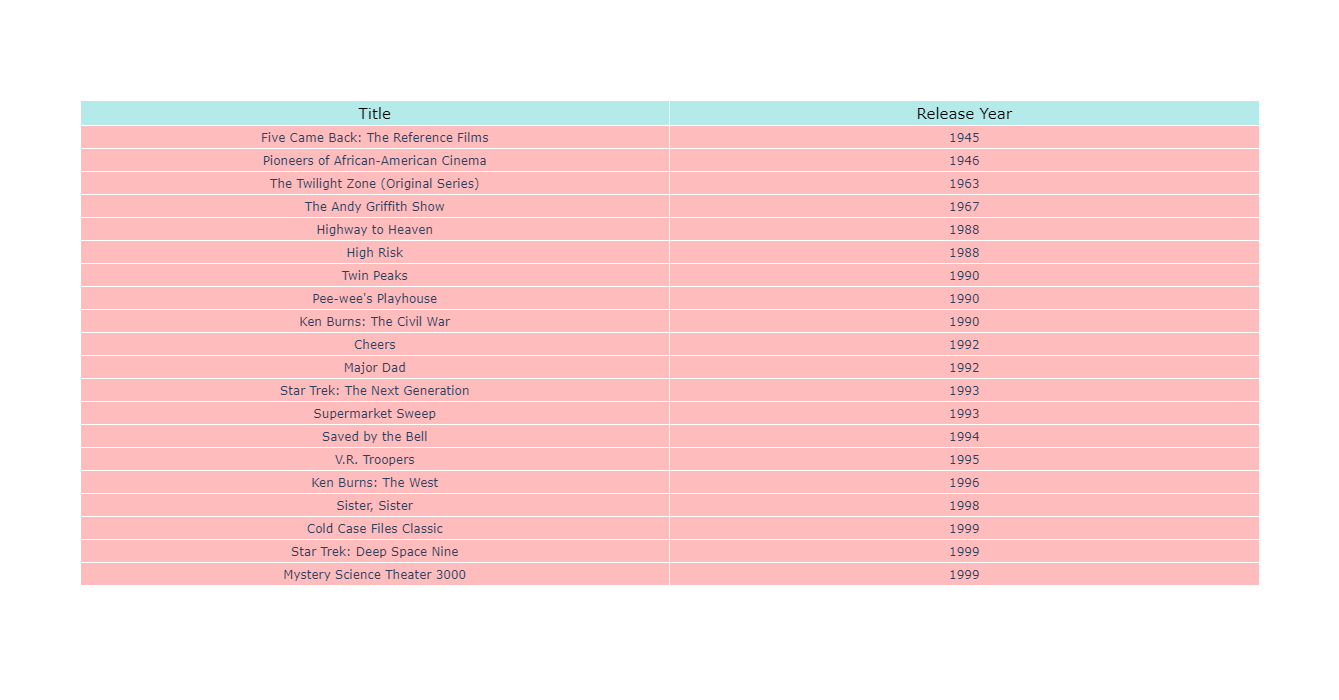

In [37]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],
                                           fill_color='#B5EAEA',
                                           align='center',
                                           line_color='white',
                                           font_size=15,
                                           font=dict(color='black', size=15),
                                           height=25),
                               cells=dict(values=[oldest_us_series['title'],oldest_us_series['release_year']],
                                          fill_color='#FFBCBC',
                                          align="center",
                                          height=23))])

fig.update_layout(width=1000, height=700)
fig.show()

## Latest US TV Shows on Netflix

In [38]:
us_series_data = netflix_shows[netflix_shows['country']=='United States']
oldest_us_series=us_series_data.sort_values(by='release_year', ascending=False)[0:20]

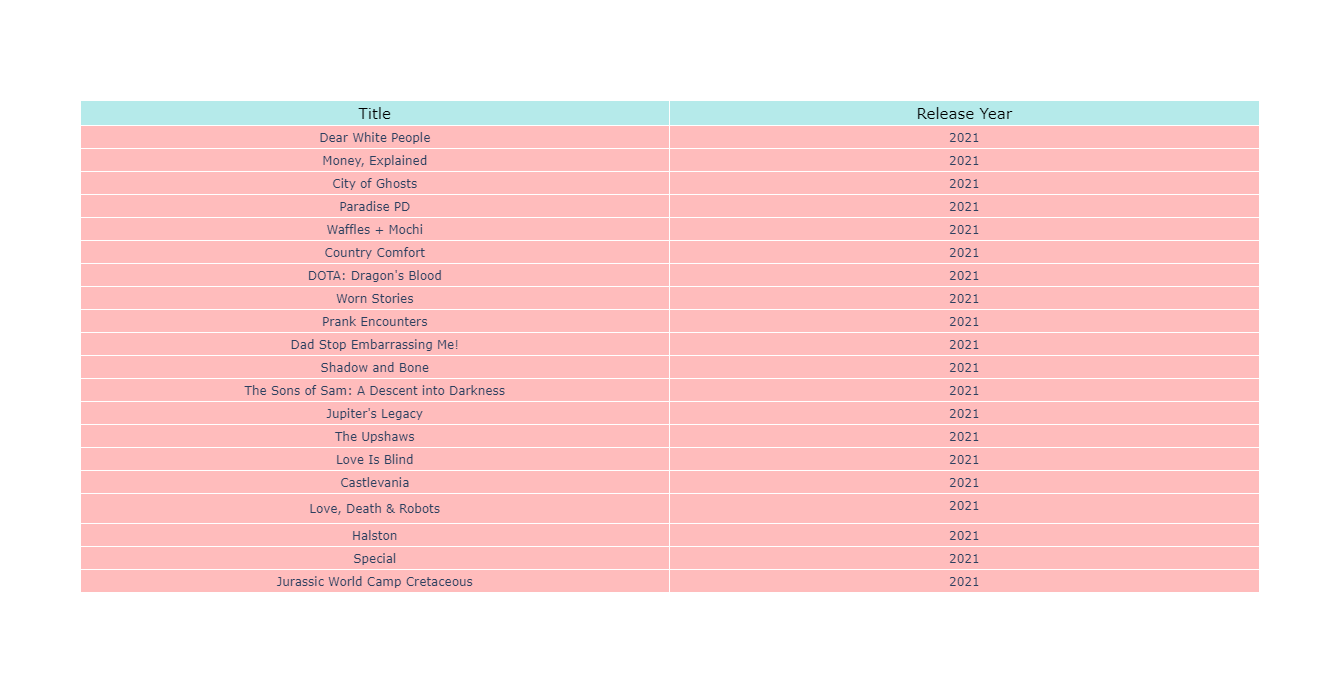

In [39]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],
                                           fill_color='#B5EAEA',
                                           align='center',
                                           line_color='white',
                                           font_size=15,
                                           font=dict(color='black', size=15),
                                           height=25),
                               cells=dict(values=[oldest_us_series['title'],oldest_us_series['release_year']],
                                          fill_color='#FFBCBC',
                                          align="center",
                                          height=23))])

fig.update_layout(width=1000, height=700)
fig.show()

## Content in France

In [40]:
netflix_fr = Netflix[Netflix['country'] == 'France']
netflix_fr = netflix_fr.dropna()

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



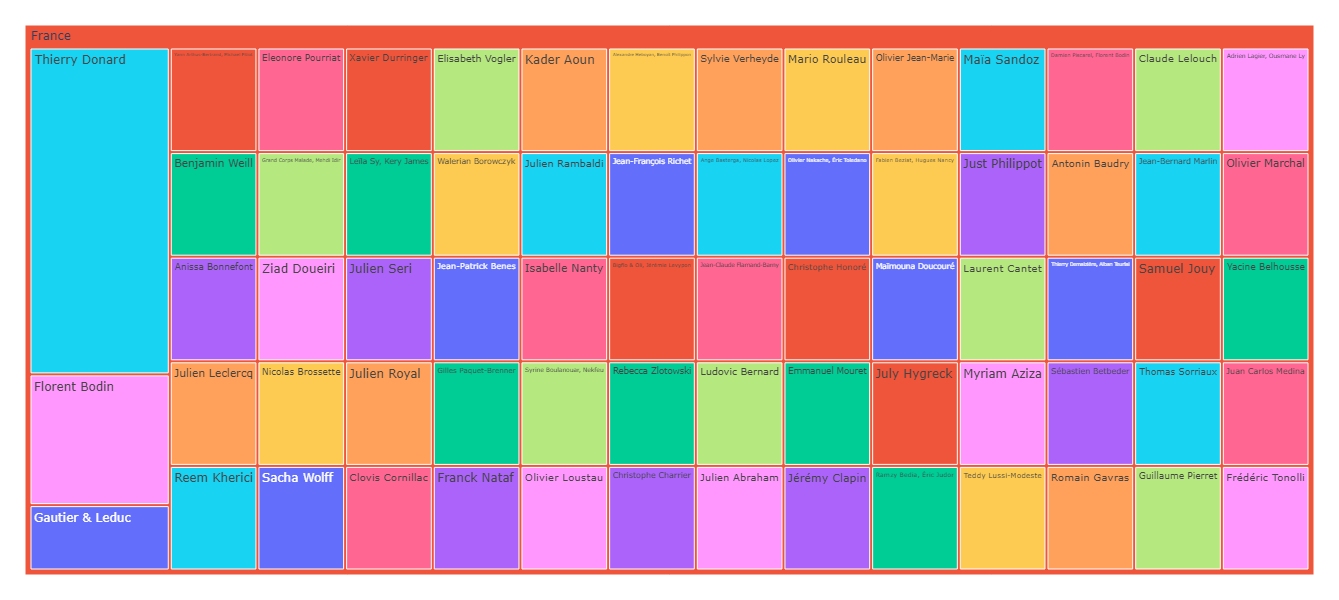

In [41]:
import plotly.express as px

fig = px.treemap(netflix_fr,
                 path=['country', 'director'],
                 color='director',
                 hover_data=['director', 'title'],
                 color_continuous_scale='lightblue')

fig.update_layout(margin=dict(t=25, l=25, r=25, b=25),
                  width=1200,
                  height=600,
                  treemapcolorway=["pink", "lightgray"])
fig.show()

## Analysing IMDB Ratings to Get Top Rated Movies

In [42]:
imdb_ratings = pd.read_csv('IMDB_ratings.csv', usecols=['weighted_average_vote'])
imdb_titles = pd.read_csv('IMDB_movies.csv', usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})

ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

C:\Users\user\AppData\Local\Temp\ipykernel_19216\2233518489.py:2: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



(85852, 4)

In [43]:
ratings.dropna()
joint_data = ratings.merge(Netflix, left_on='Title', right_on='title', how='inner')
joint_data = joint_data.sort_values(by='Rating', ascending=False)
joint_data.head()

Title Release Year  Rating                      Genre  \
1105          Innocent         2017     9.0                     Comedy   
1116          Breakout         2019     9.0   Adventure, Comedy, Drama   
441       Pulp Fiction         1994     8.9               Crime, Drama   
421   Schindler's List         1993     8.9  Biography, Drama, History   
1442         Inception         2010     8.8  Action, Adventure, Sci-Fi   

     show_id     type             title           director  \
1105   s4175  TV Show          Innocent         Seren Yüce   
1116   s5394  TV Show          Breakout                NaN   
441    s7803    Movie      Pulp Fiction  Quentin Tarantino   
421    s7958    Movie  Schindler's List   Steven Spielberg   
1442    s341    Movie         Inception  Christopher Nolan   

                                                   cast  \
1105  Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...   
1116  Jeanette Aw, Elvin Ng, Zhou Ying, Christopher ...   
441   John Travolta, Samuel L. Jackson, Uma Thurman,...   
421   Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...   
1442  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...   

                            country        date_added  release_year rating  \
1105                         Turkey  January 23, 2019          2017  TV-MA   
1116                            NaN      July 1, 2017          2010  TV-14   
441                   United States   January 1, 2019          1994      R   
421                   United States     April 1, 2018          1993      R   
1442  United States, United Kingdom    August 1, 2021          2010  PG-13   

      duration                                          listed_in  \
1105  1 Season  Crime TV Shows, International TV Shows, TV Dramas   
1116  1 Season                  International TV Shows, TV Dramas   
441    154 min                Classic Movies, Cult Movies, Dramas   
421    195 min                             Classic Movies, Dramas   
1442   148 min    Action & Adventure, Sci-Fi & Fantasy, Thrillers   

                                            description  
1105  In a peaceful, rustic town, a retired officer ...  
1116  After losing her family in a suspicious car cr...  
441   This stylized crime caper weaves together stor...  
421   Oskar Schindler becomes an unlikely humanitari...  
1442  A troubled thief who extracts secrets from peo...

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



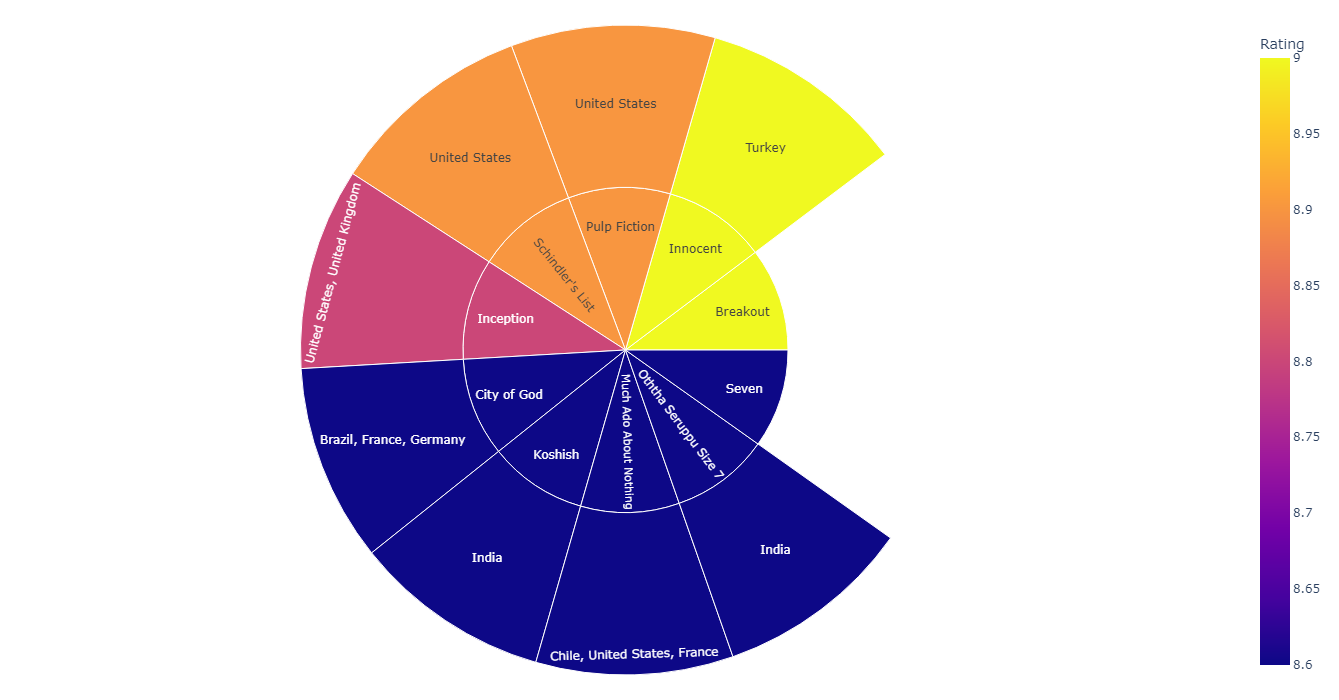

In [44]:
import plotly.express as px
top_rated = joint_data[0:10]

fig =px.sunburst(
    top_rated,
    path=['title','country'],
    values='Rating',
    color='Rating')


fig.update_layout(margin=dict(t=25, l=25, r=25, b=25),
                  width=1200,
                  height=700,
                  treemapcolorway=["pink", "lightgray"])

fig.show()

In [45]:
country_count = joint_data['country'].value_counts().sort_values(ascending=False)
country_count = pd.DataFrame(country_count)
topcountries = country_count[0:10]
topcountries

country
United States       865
India               718
United Kingdom      119
Canada               57
Philippines          50
Spain                41
Indonesia            38
South Korea          38
France               37
Nigeria              31

In [46]:
country_names = []
for each in topcountries.index:
    country_names.append(each)
    # print(each[0])
country_names

['United States',
 'India',
 'United Kingdom',
 'Canada',
 'Philippines',
 'Spain',
 'Indonesia',
 'South Korea',
 'France',
 'Nigeria']

In [47]:
country_count = []
for each in topcountries.values:
    country_count.append(each[0])
    # print(each[0])
country_count

[865, 718, 119, 57, 50, 41, 38, 38, 37, 31]

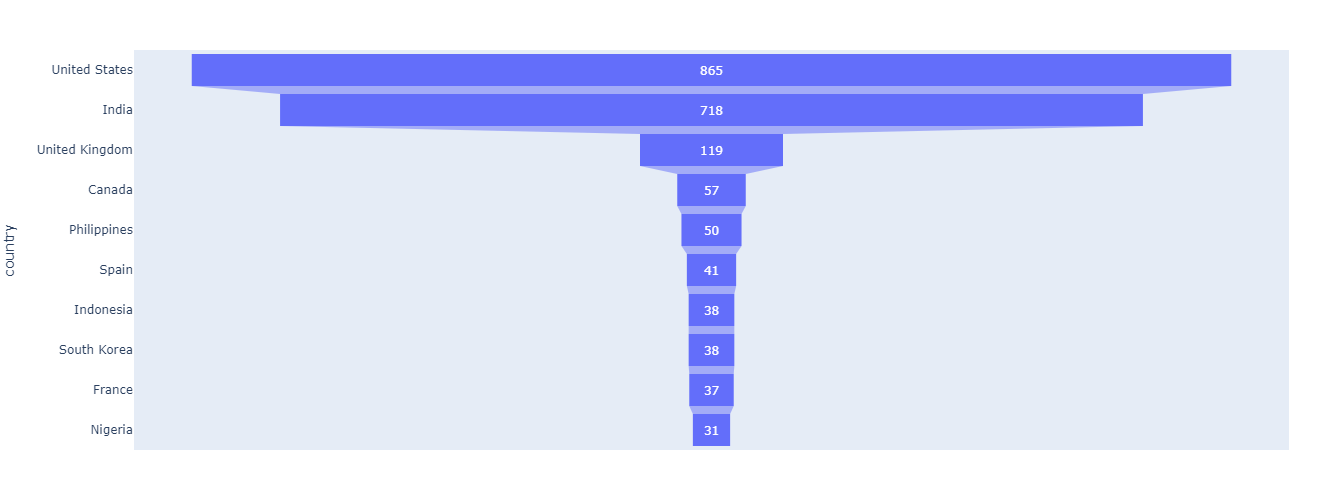

In [48]:
import plotly.express as px

data = dict(number=country_count, country=country_names)


fig = px.funnel(data, x='number', y='country')
fig.update_layout(margin=dict(t=50, l=50, r=50, b=50),
                  width=1200,
                  height=500)

fig.show()

## Netflix TV Shows & Movies Adapted from Books

In [49]:
books = pd.read_csv('books.csv')
books['original_title'] = books['original_title'].str.lower()
x = Netflix
x['title'] = x['title'].str.lower()
combined = x.merge(books, left_on='title', right_on='original_title', how="inner")

In [50]:
combined['title_x'].notna().count()

339

In [51]:
Netflix['title'].notna().count()

8807

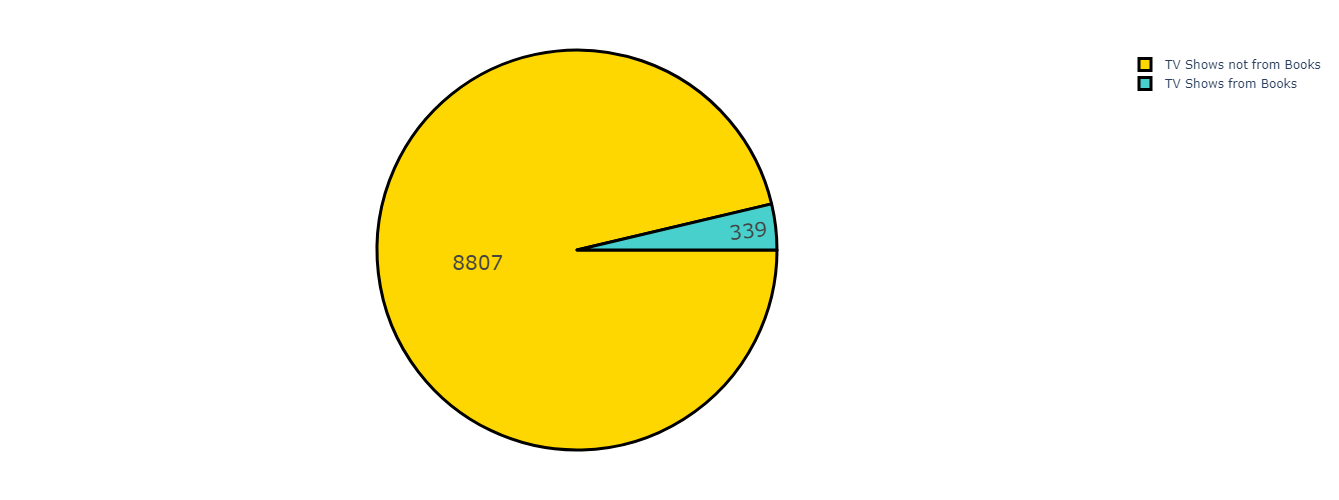

In [52]:
import plotly.graph_objects as go

labels = ['TV Shows from Books','TV Shows not from Books']
values = [339, 8807]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

colors = ['mediumturquoise', 'gold', ]
fig.update_traces(
    hoverinfo='label+percent', textinfo=('value'), 
    textfont_size=20, 
    rotation=90,
    marker=dict(colors=colors, line=dict(color='#000000', width=3)))


fig.update_layout(margin=dict(t=50, l=50, r=50, b=50),
                  width=650,
                  height=500)
fig.show()

## Recommendation System (Content Based)

In [53]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# corpus = [
#     'This is the first document.', 
#     'This document is the second document.', 
#     'And this is the third one.', 
#     'Is this the first document?']

# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(corpus)

In [54]:
# print(vectorizer.get_feature_names_out())
# ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']

In [55]:
# print(X.shape)
# (4, 9)

In [56]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# corpus = [
#     'This is the first document.', 
#     'This document is the second document.', 
#     'And this is the third one.', 
#     'Is this the first document?']

# # stop_words='english'
# vectorizer = TfidfVectorizer(stop_words='english')

# X = vectorizer.fit_transform(corpus)

# print(vectorizer.get_feature_names_out())
# ['document' 'second']

In [57]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# corpus = [
#     'This is the first document.', 
#     'This document is the second document.', 
#     'And this is the third one.', 
#     'Is this the first document?']

# vectorizer = TfidfVectorizer(min_df=0.4)
# X = vectorizer.fit_transform(corpus)

# print(vectorizer.get_feature_names_out())
# ['document' 'first' 'is' 'the' 'this']

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

#removing stopwords
vectorizer = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
Netflix['description'] = Netflix['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = vectorizer.fit_transform(Netflix['description'])

# print(vectorizer.get_feature_names())

#Output the shape of tfidf_matrix
# print(tfidf_matrix)

tfidf_matrix.shape

(8807, 18895)

In [59]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.01538292,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.02230089],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.01538292, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.02230089, ..., 0.        , 0.        ,
        1.        ]])

In [60]:
indices = pd.Series(Netflix.index, index=Netflix['title']).drop_duplicates()
indices

title
dick johnson is dead        0
blood & water               1
ganglands                   2
jailbirds new orleans       3
kota factory                4
                         ... 
zodiac                   8802
zombie dumb              8803
zombieland               8804
zoom                     8805
zubaan                   8806
Length: 8807, dtype: int64

In [61]:
def get_recommendations(title, cosine_sim=cosine_sim):
    title = title.lower()
    idx = indices[title]
    # print(idx)
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    # print(sim_scores)
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return Netflix['title'].iloc[movie_indices]

In [62]:
get_recommendations('Peaky Blinders')

7683                    our godfather
2646                   my stupid boss
3133                              don
8293                         the fear
7140    jonathan strange & mr norrell
7785                power rangers zeo
8467                       the prison
8539                       the tudors
1510                    the con is on
8391     the legend of michael mishra
Name: title, dtype: object

In [63]:
get_recommendations('Extraction')

6086              act of valor
1633                   the 2nd
7063                  incoming
2241     the business of drugs
6511    code name: the cleaner
7328                   lockout
1764                   snowden
373         the last mercenary
8686                      waar
4580                   kurbaan
Name: title, dtype: object

## Content Based Filtering on Multiple Metrics (Title, Cast, Director, Listed-in, Plot)

In [64]:
filledna= Netflix.fillna('')
filledna.head(2)

show_id     type                 title         director  \
0      s1    Movie  dick johnson is dead  Kirsten Johnson   
1      s2  TV Show         blood & water                    

                                                cast        country  \
0                                                     United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...

In [65]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [66]:
features = ['title', 'director', 'cast', 'listed_in', 'description']
filledna = filledna[features]
filledna.head(2)

title         director  \
0  dick johnson is dead  Kirsten Johnson   
1         blood & water                    

                                                cast  \
0                                                      
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...

In [67]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head(2)

title        director  \
0  dickjohnsonisdead  kirstenjohnson   
1        blood&water                   

                                                cast  \
0                                                      
1  amaqamata,khosingema,gailmabalane,thabangmolab...   

                                   listed_in  \
0                              documentaries   
1  internationaltvshows,tvdramas,tvmysteries   

                                         description  
0  asherfathernearstheendofhislife,filmmakerkirst...  
1  aftercrossingpathsataparty,acapetownteensetsou...

In [68]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [69]:
filledna['soup'] = filledna.apply(create_soup, axis=1)
filledna.head()

title        director  \
0    dickjohnsonisdead  kirstenjohnson   
1          blood&water                   
2            ganglands  julienleclercq   
3  jailbirdsneworleans                   
4          kotafactory                   

                                                cast  \
0                                                      
1  amaqamata,khosingema,gailmabalane,thabangmolab...   
2  samibouajila,tracygotoas,samueljouy,nabihaakka...   
3                                                      
4  mayurmore,jitendrakumar,ranjanraj,alamkhan,ahs...   

                                           listed_in  \
0                                      documentaries   
1          internationaltvshows,tvdramas,tvmysteries   
2  crimetvshows,internationaltvshows,tvaction&adv...   
3                               docuseries,realitytv   
4    internationaltvshows,romantictvshows,tvcomedies   

                                         description  \
0  asherfathernearstheendofhislife,filmmakerkirst...   
1  aftercrossingpathsataparty,acapetownteensetsou...   
2  toprotecthisfamilyfromapowerfuldruglord,skille...   
3  feuds,flirtationsandtoilettalkgodownamongthein...   
4  inacityofcoachingcentersknowntotrainindia’sfin...   

                                                soup  
0  dickjohnsonisdead kirstenjohnson  documentarie...  
1  blood&water  amaqamata,khosingema,gailmabalane...  
2  ganglands julienleclercq samibouajila,tracygot...  
3  jailbirdsneworleans   docuseries,realitytv feu...  
4  kotafactory  mayurmore,jitendrakumar,ranjanraj...

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count_vectorizer = CountVectorizer(stop_words='english')

count_matrix = count_vectorizer.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
filledna.head(3)

title        director  \
0  dickjohnsonisdead  kirstenjohnson   
1        blood&water                   
2          ganglands  julienleclercq   

                                                cast  \
0                                                      
1  amaqamata,khosingema,gailmabalane,thabangmolab...   
2  samibouajila,tracygotoas,samueljouy,nabihaakka...   

                                           listed_in  \
0                                      documentaries   
1          internationaltvshows,tvdramas,tvmysteries   
2  crimetvshows,internationaltvshows,tvaction&adv...   

                                         description  \
0  asherfathernearstheendofhislife,filmmakerkirst...   
1  aftercrossingpathsataparty,acapetownteensetsou...   
2  toprotecthisfamilyfromapowerfuldruglord,skille...   

                                                soup  
0  dickjohnsonisdead kirstenjohnson  documentarie...  
1  blood&water  amaqamata,khosingema,gailmabalane...  
2  ganglands julienleclercq samibouajila,tracygot...

In [71]:
filledna = filledna.reset_index()
filledna.head(3)

index              title        director  \
0      0  dickjohnsonisdead  kirstenjohnson   
1      1        blood&water                   
2      2          ganglands  julienleclercq   

                                                cast  \
0                                                      
1  amaqamata,khosingema,gailmabalane,thabangmolab...   
2  samibouajila,tracygotoas,samueljouy,nabihaakka...   

                                           listed_in  \
0                                      documentaries   
1          internationaltvshows,tvdramas,tvmysteries   
2  crimetvshows,internationaltvshows,tvaction&adv...   

                                         description  \
0  asherfathernearstheendofhislife,filmmakerkirst...   
1  aftercrossingpathsataparty,acapetownteensetsou...   
2  toprotecthisfamilyfromapowerfuldruglord,skille...   

                                                soup  
0  dickjohnsonisdead kirstenjohnson  documentarie...  
1  blood&water  amaqamata,khosingema,gailmabalane...  
2  ganglands julienleclercq samibouajila,tracygot...

In [72]:
indices = pd.Series(filledna.index, index=filledna['title'])

In [73]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return Netflix['title'].iloc[movie_indices]

In [74]:
get_recommendations_new('Peaky Blinders', cosine_sim2)

3034                    giri / haji
5032    the frankenstein chronicles
8431          the murder detectives
4951                         loaded
4809                  kiss me first
6922                   happy valley
2184                       get even
519                   i am a killer
3789                 killer ratings
4476          terrorism close calls
Name: title, dtype: object

In [75]:
get_recommendations_new('Extraction', cosine_sim2)

7403               marauders
6759              first kill
8464              the prince
4170                   polar
8268        the darkest dawn
354       the last boy scout
952     the whole nine yards
7985                  set up
1659               hard kill
6088        acts of violence
Name: title, dtype: object

## Netflix Platform Growth Over the Years

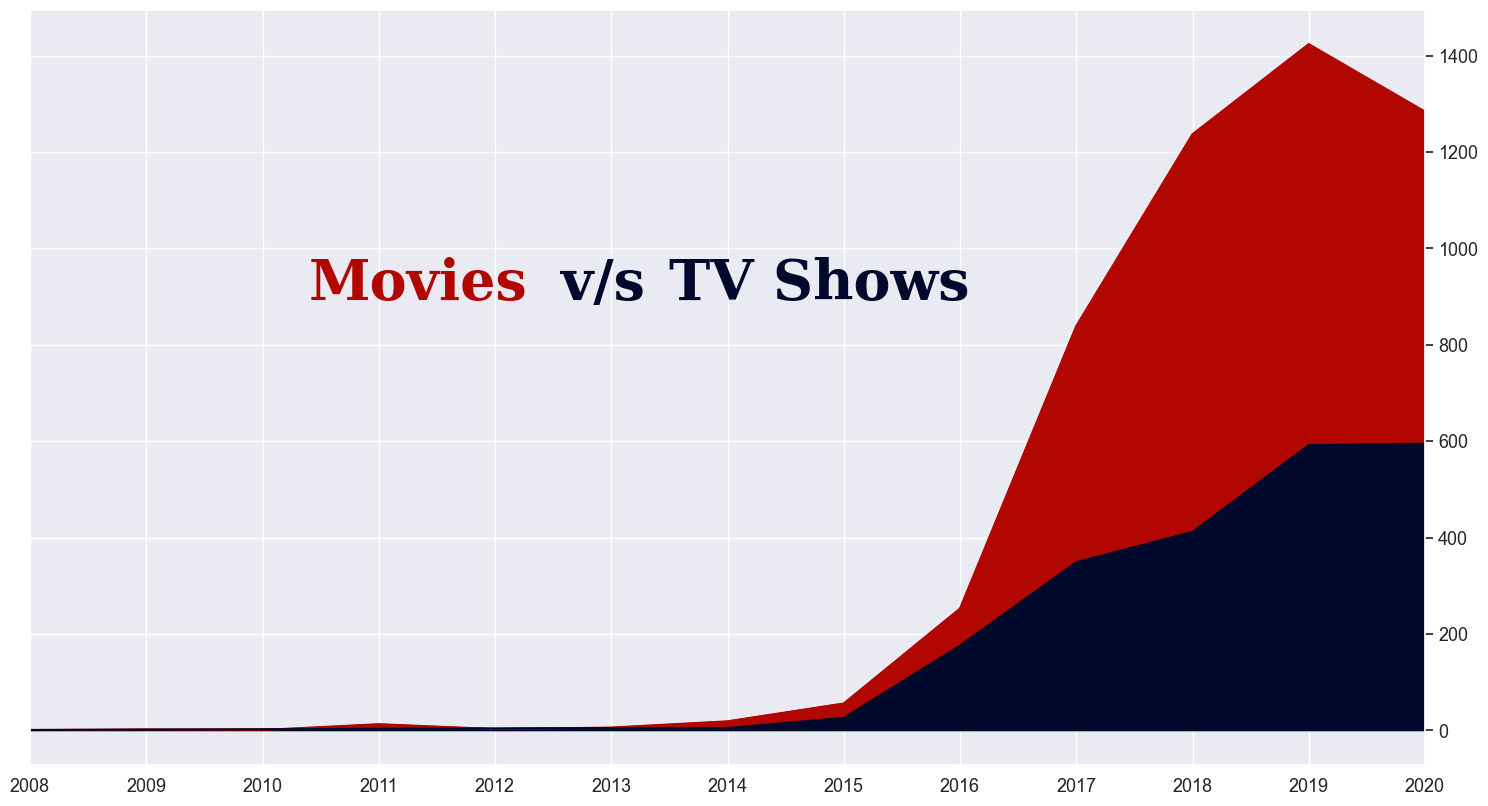

In [78]:
Netflix["date_added"] = pd.to_datetime(Netflix['date_added'])
Netflix['year_added'] = Netflix['date_added'].dt.year

fig, ax = plt.subplots(1, 1, figsize=(18, 10), dpi=100)
color = ["#B20600", "#00092C"]


for i, mtv in enumerate(Netflix['type'].value_counts().index):
    mtv_rel = Netflix[Netflix['type']==mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=1)
    
    
# Set Y axis on the right
ax.yaxis.tick_right()

# Set x axis limit & interval
ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1), fontsize=13)
plt.yticks(fontsize=13)

fig.text(0.28,0.59,"Movies", fontweight="bold", fontfamily='serif', fontsize=40, color='#B20600', alpha=1)
fig.text(0.42,0.59,"v/s", fontweight="bold", fontfamily='serif', fontsize=40, color='#00092C', alpha=1)
fig.text(0.48,0.59,"TV Shows", fontweight="bold", fontfamily='serif', fontsize=40, color='#00092C', alpha=1)

plt.show()

## Neflix Distribution Across the Globe

In [79]:
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

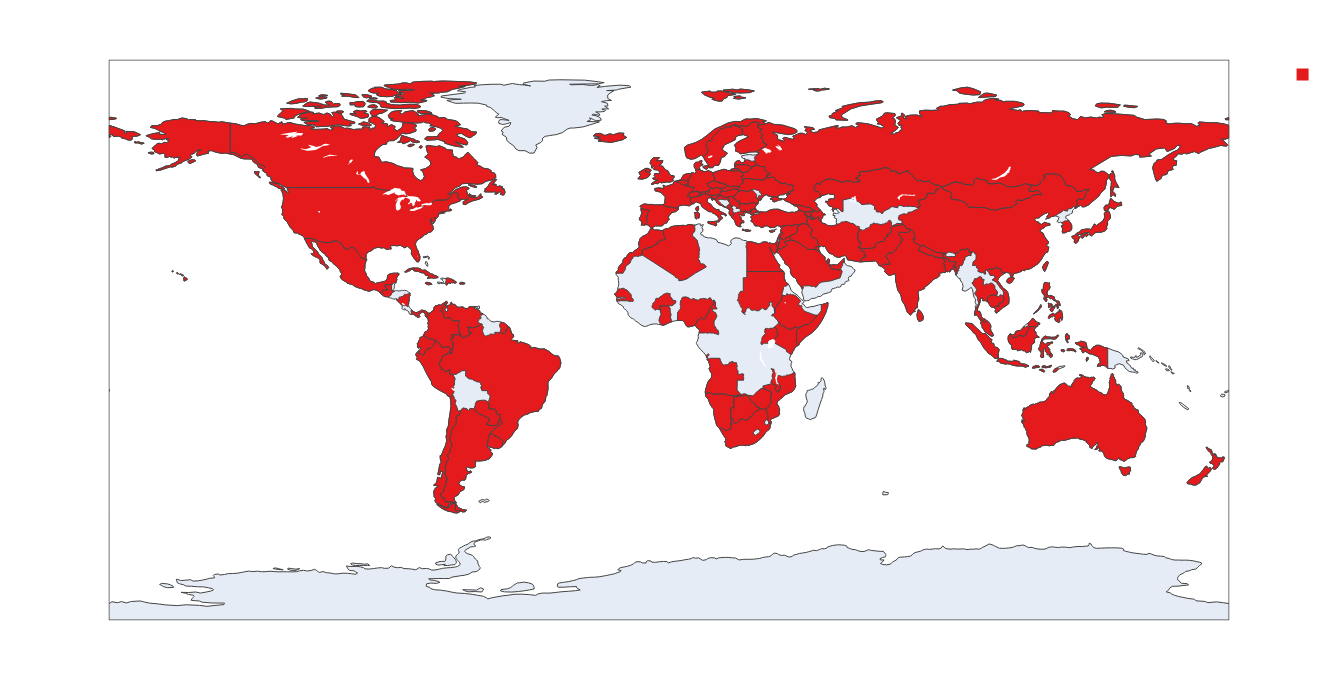

In [80]:
import plotly.express as px
from collections import Counter
country_with_code= {}
shows_countries = ", ".join(Netflix['country'].dropna()).split(", ")
for c,v in dict(Counter(shows_countries)).items():
    code = ""
    if c.lower() in country_codes:
        code = country_codes[c.lower()]
    country_with_code[code] = v    

    
fig = px.choropleth(
    list(country_with_code.values()), 
    locations=list(country_with_code.keys()), 
    width=1500, 
    height=700, 
    color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

# Thank you for spending your time on my Netflix EDA